In [93]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
data = pd.read_csv('unionall_dropdup.csv', header = 0)
print(data.shape)
feature = pd.DataFrame.as_matrix(data.iloc[:,2:722])
fps = pd.DataFrame.as_matrix(data.iloc[:,722:850])
record = pd.DataFrame.as_matrix(data.iloc[:,1:2])
obs = pd.DataFrame.as_matrix(data.iloc[:,0:1])
print(feature.shape)
print(record.shape)
print(fps.shape)

(211, 850)
(211, 720)
(211, 1)
(211, 128)


In [96]:
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, record, test_size = 0.25, random_state = 0)
train_x_fps, test_x_fps, train_y_fps, test_y_fps = train_test_split(fps, record, test_size = 0.25, random_state = 0)

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print(train_x_fps.shape,train_y_fps.shape)
print(test_x_fps.shape,test_y_fps.shape)

(158, 720) (158, 1)
(53, 720) (53, 1)
(158, 128) (158, 1)
(53, 128) (53, 1)


In [57]:
from __future__ import print_function
import numpy as np

#class RBM:
    def __init__(self, num_visible, num_hidden):
        self.num_hidden = num_hidden
        self.num_visible = num_visible
        self.debug_print = True
        np_rng = np.random.RandomState(1234)
        self.weights = np.asarray(np_rng.uniform(
            low=-0.1 * np.sqrt(6. / (num_hidden + num_visible)),
            high=0.1 * np.sqrt(6. / (num_hidden + num_visible)),
            size=(num_visible, num_hidden)))
        self.weights = np.insert(self.weights, 0, 0, axis = 0)
        self.weights = np.insert(self.weights, 0, 0, axis = 1)
    
    def train(self, data, max_epochs = 1000, learning_rate = 0.001):
        num_examples = data.shape[0]
        data = np.insert(data, 0, 1, axis = 1)
        for epoch in range(max_epochs):
            pos_hidden_activations = np.dot(data, self.weights)
            pos_hidden_probs = self._logistic(pos_hidden_activations)
            pos_hidden_probs[:,0] = 1 # Fix the bias unit.
            pos_hidden_states = pos_hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
            pos_associations = np.dot(data.T, pos_hidden_probs)
            neg_visible_activations = np.dot(pos_hidden_states, self.weights.T)
            neg_visible_probs = self._logistic(neg_visible_activations)
            neg_visible_probs[:,0] = 1 # Fix the bias unit.
            neg_hidden_activations = np.dot(neg_visible_probs, self.weights)
            neg_hidden_probs = self._logistic(neg_hidden_activations)
            neg_associations = np.dot(neg_visible_probs.T, neg_hidden_probs)
            self.weights += learning_rate * ((pos_associations - neg_associations) / num_examples)
            error = np.sum((data - neg_visible_probs) ** 2)
            
            if self.debug_print:
                print("Epoch %s: error is %s" % (epoch, error))

    def run_visible(self, data):
        num_examples = data.shape[0]
        hidden_states = np.ones((num_examples, self.num_hidden + 1))
        data = np.insert(data, 0, 1, axis = 1)
        hidden_activations = np.dot(data, self.weights)
        hidden_probs = self._logistic(hidden_activations)
        hidden_states[:,:] = hidden_probs > np.random.rand(num_examples, self.num_hidden + 1)
        hidden_states = hidden_states[:,1:]
        
        return hidden_states
    
    def run_hidden(self, data):
        num_examples = data.shape[0]
        visible_states = np.ones((num_examples, self.num_visible + 1))
        data = np.insert(data, 0, 1, axis = 1)
        visible_activations = np.dot(data, self.weights.T)
        visible_probs = self._logistic(visible_activations)
        visible_states[:,:] = visible_probs > np.random.rand(num_examples, self.num_visible + 1)
        visible_states = visible_states[:,1:]
        
        return visible_states
    
    def daydream(self, num_samples):
        samples = np.ones((num_samples, self.num_visible + 1))
        samples[0,1:] = np.random.rand(self.num_visible)
        for i in range(1, num_samples):
            visible = samples[i-1,:]
            hidden_activations = np.dot(visible, self.weights)
            hidden_probs = self._logistic(hidden_activations)
            hidden_states = hidden_probs > np.random.rand(self.num_hidden + 1)
            hidden_states[0] = 1
            visible_activations = np.dot(hidden_states, self.weights.T)
            visible_probs = self._logistic(visible_activations)
            visible_states = visible_probs > np.random.rand(self.num_visible + 1)
            samples[i,:] = visible_states
            return samples[:,1:]        
      
    def _logistic(self, x):
        return 1.0 / (1 + np.exp(-x))

IndentationError: unexpected indent (<ipython-input-57-ea7a18bbd97f>, line 5)

In [62]:
#if __name__ == '__main__':
    r = RBM(num_visible = 128, num_hidden = 2)
    #training_data = np.array([[1,1,1,0,0,0],[1,0,1,0,0,0],[1,1,1,0,0,0],[0,0,1,1,1,0], [0,0,1,1,0,0],[0,0,1,1,1,0]])
    training_data= train_x_fps
    r.train(training_data, max_epochs = 50)
    #print(r.weights)
    user = test_x_fps
    #print(r.run_visible(user))

IndentationError: unexpected indent (<ipython-input-62-8749a6127fb0>, line 2)


Epoch: 0:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.2589

Epoch: 1:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.2446

Epoch: 2:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.2295

Epoch: 3:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.2164

Epoch: 4:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.2054

Epoch: 5:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.1958

Epoch: 6:   0%|                                                                                 | 0/16 [00:00<?, ?it/s]
Train error: 0.1877

Epoch: 7:   

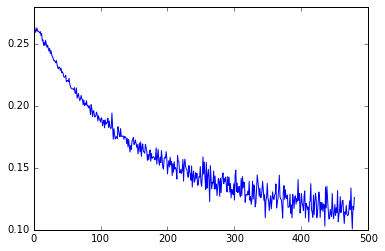

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from tfrbm import BBRBM, GBRBM
#from tensorflow.examples.tutorials.mnist import input_data
bbrbm = BBRBM(n_visible=128, n_hidden=64, learning_rate=0.01, 
              momentum=0.9, use_tqdm=True)
errs = bbrbm.fit(train_x_fps, n_epoches=30, batch_size=10)
plt.plot(errs)
plt.show()

Epoch: 0
Train error: 0.2725

Epoch: 1
Train error: 0.2129

Epoch: 2
Train error: 0.1618

Epoch: 3
Train error: 0.1275

Epoch: 4
Train error: 0.1060

Epoch: 5
Train error: 0.0926

Epoch: 6
Train error: 0.0848

Epoch: 7
Train error: 0.0802

Epoch: 8
Train error: 0.0772

Epoch: 9
Train error: 0.0758

Epoch: 10
Train error: 0.0747

Epoch: 11
Train error: 0.0742

Epoch: 12
Train error: 0.0739

Epoch: 13
Train error: 0.0735

Epoch: 14
Train error: 0.0735

Epoch: 15
Train error: 0.0736

Epoch: 16
Train error: 0.0734

Epoch: 17
Train error: 0.0734

Epoch: 18
Train error: 0.0731

Epoch: 19
Train error: 0.0730

Epoch: 20
Train error: 0.0732

Epoch: 21
Train error: 0.0728

Epoch: 22
Train error: 0.0727

Epoch: 23
Train error: 0.0727

Epoch: 24
Train error: 0.0728

Epoch: 25
Train error: 0.0728

Epoch: 26
Train error: 0.0725

Epoch: 27
Train error: 0.0725

Epoch: 28
Train error: 0.0725

Epoch: 29
Train error: 0.0724



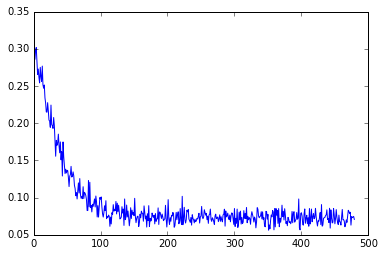

In [125]:
gbrbm = GBRBM(n_visible=128, n_hidden=64, learning_rate=0.01, 
              momentum=0.9, err_function='mse', use_tqdm=False, 
              sample_visible=False, sigma=1)
errs = gbrbm.fit(train_x_fps, n_epoches=30, batch_size=10)
plt.plot(errs)
plt.show()

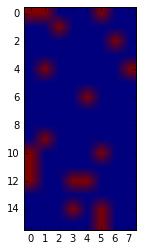

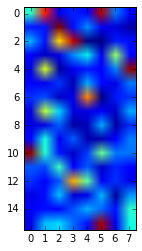

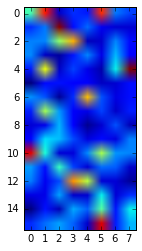

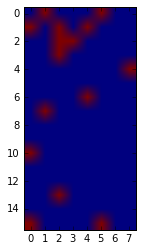

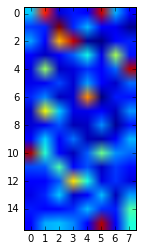

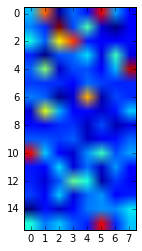

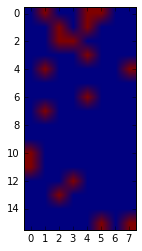

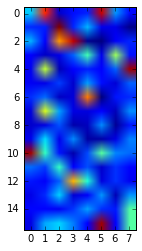

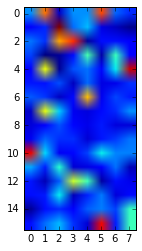

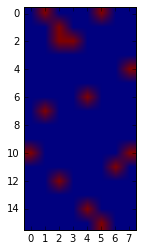

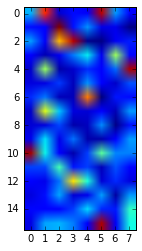

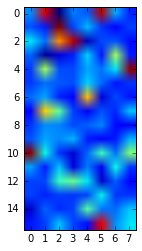

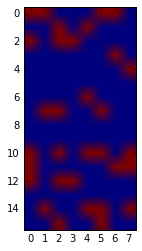

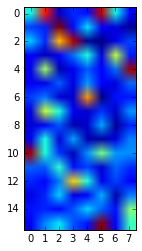

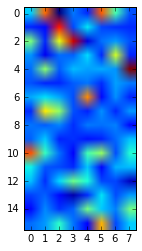

In [129]:
def show_digit(x):
    plt.imshow(x.reshape((16, 8)))
    plt.show()
for i in range(5):
    image = test_x_fps[i]
    image_rec = bbrbm.reconstruct(image.reshape(1,-1))
    image_rec_g = gbrbm.reconstruct(image.reshape(1,-1))
    show_digit(image)
    show_digit(image_rec)
    show_digit(image_rec_g)